**Introduction :**

The DBSCAN stands for density based spatial clustering of applications with noise.

It was introduced around 1996 and has gained significant popularity in the community due to its effective clustering ability of recognizing different types of clustering shapes and also the ability to identify the clusters correctly even in the presence of noise.


**Epsilon(ɛ) :**
It is the distance or radius around each object.

**Min Points:**
MinPoints are the number of points that must exist within ɛ distance from the point.

**Core Point:**
Considering below diagram, one circle is drawn whose center is the Query point and radius is ɛ. The query point will become Core point if number of points inside circle is more than MinPoints (in this case MinPoints = 2). So the query point has qualified to become Core point.

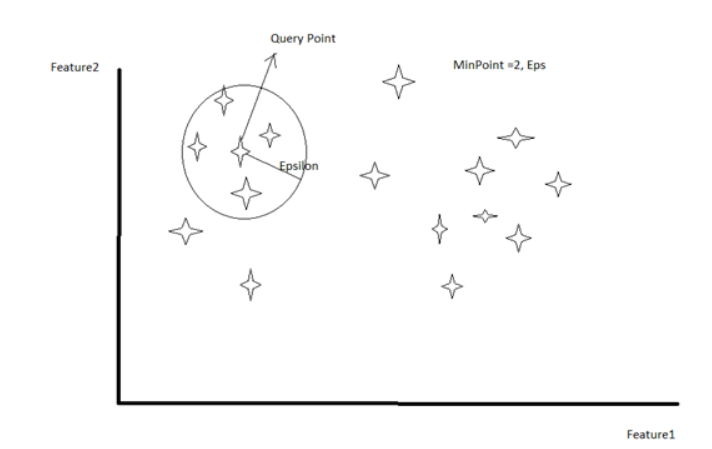

**Border Point:**
If a query point has lesser than MinPoints within ɛ but has a core point within ɛ distance, then it is a Border point.

**Noise Point:**
A point which is neither a Core nor a Border point is called as Noise point. See below diagram.

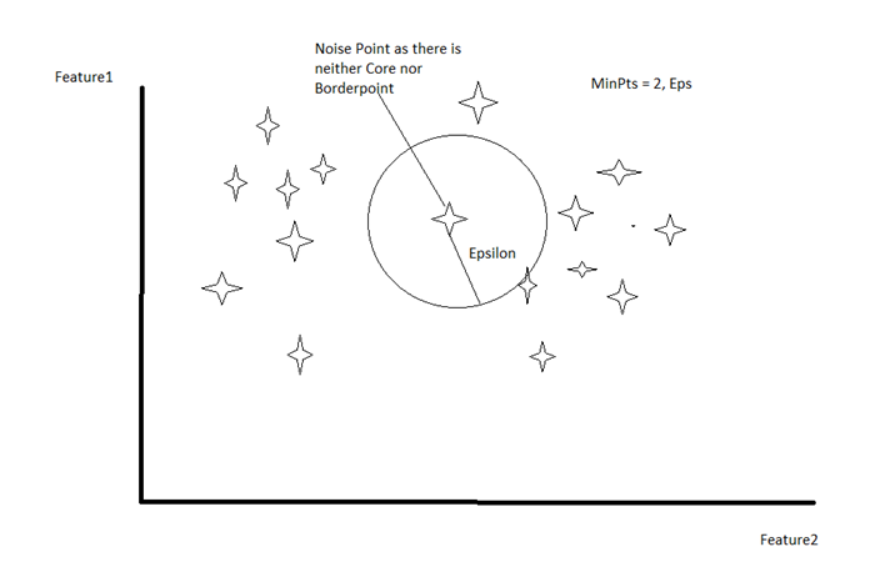

The DBSCAN will process each and every object/points in this fashion and at the end it will obtain categorization of all the points as either core, border or noise points.

Once the categorization of the points are obtained, the next step is to use them to construct the clusters. DBSCAN take up a core point and then look at the points which are inside its Epsilon radius circle and assign a Cluster label to those points.

So the key idea is to give the same label to all the points inside the circle of a core point.

Multiple iterations will be run for different core points to assign Cluster label, please note algorithm will not assign new Cluster label to those points which have already be considered in earlier iteration.

**Import Libraries**

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as  plt
import seaborn as sns


from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [67]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [68]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
data = df.iloc[:, [3, 4]].values

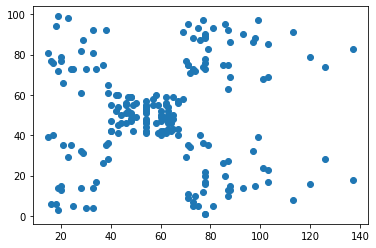

In [70]:
# visualizing the dataset
plt.scatter(data[:, 0], data[:, 1])

**Compute DBSCAN**

In [80]:
dbscan = DBSCAN(eps=3, min_samples=4)
labels = dbscan.fit_predict(data)
labels = db.labels_
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5])

In [72]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [73]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 65


**Here Label -1 will be noise/Outliers in dataset.
And other are cluster. 0-cluster,1-cluster,2-cluster,3-cluster,4-cluster,5-cluster**

# Plotting graph - DBScan#
**Method-1**



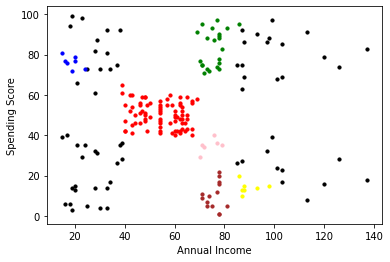

In [76]:
# Visualising the clusters
plt.scatter(data[labels == -1, 0], data[labels == -1, 1], s = 10, c = 'black')
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], s = 10, c = 'red')
plt.scatter(data[labels == 2, 0], data[labels == 2, 1], s = 10, c = 'green')
plt.scatter(data[labels == 3, 0], data[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(data[labels == 4, 0], data[labels == 4, 1], s = 10, c = 'pink')
plt.scatter(data[labels == 5, 0], data[labels == 5, 1], s = 10, c = 'yellow')      
plt.scatter(data[labels == 6, 0], data[labels == 6, 1], s = 10, c = 'silver')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


**Plot result**

**Method-2**

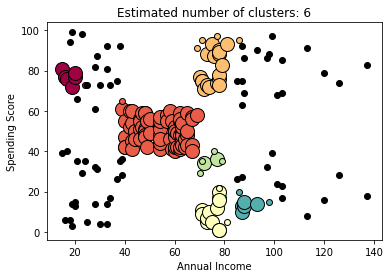

In [78]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


**Conclusion:**

As clustering is unsupervised learning, you need to analyze each cluster and have a definition with respect to business data because Clustering is always guided by some business rules. Once your clusters are close to business rules, your model will make sense.

We can also change the value for eps and Min_sample to tune the model and make clusters better in shapes.

Thank you for reading.